In [32]:
from Abhi import KNN
import pandas as pd 
import numpy as np

from future.utils import iteritems

import seaborn as sns 

import matplotlib.pyplot as plt

import operator

In [33]:
col_names = ['erythema', 'scaling ', 'definite borders', 'itching ', 'koebner phenomenon', 'polygonal papules', 
             'ollicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement', 
             'family history', 'melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 
             'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 
             'clubbing of the rete ridges', 'elongation of the rete ridges', 'thinning of the suprapapillary epidermis', 
             'spongiform pustule', 'munro microabcess', 'focal hypergranulosis', 'disappearance of the granular layer', 
             'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes', 
             'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 
             'band-like infiltrate', 'Age', 'Disease']

Data Visualization and Data Analysis 

In [34]:
Df = pd.read_csv('dermatology.data', sep = ',' , names=col_names)

Df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,ollicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [35]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
erythema                                    366 non-null int64
scaling                                     366 non-null int64
definite borders                            366 non-null int64
itching                                     366 non-null int64
koebner phenomenon                          366 non-null int64
polygonal papules                           366 non-null int64
ollicular papules                           366 non-null int64
oral mucosal involvement                    366 non-null int64
knee and elbow involvement                  366 non-null int64
scalp involvement                           366 non-null int64
family history                              366 non-null int64
melanin incontinence                        366 non-null int64
eosinophils in the infiltrate               366 non-null int64
PNL infiltrate                              366 non-null int64
fibrosis of t

In [36]:
Df.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,ollicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Disease
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [37]:
Df.isna().any()

erythema                                    False
scaling                                     False
definite borders                            False
itching                                     False
koebner phenomenon                          False
polygonal papules                           False
ollicular papules                           False
oral mucosal involvement                    False
knee and elbow involvement                  False
scalp involvement                           False
family history                              False
melanin incontinence                        False
eosinophils in the infiltrate               False
PNL infiltrate                              False
fibrosis of the papillary dermis            False
exocytosis                                  False
acanthosis                                  False
hyperkeratosis                              False
parakeratosis                               False
clubbing of the rete ridges                 False


In [38]:
Df.isnull().any()

erythema                                    False
scaling                                     False
definite borders                            False
itching                                     False
koebner phenomenon                          False
polygonal papules                           False
ollicular papules                           False
oral mucosal involvement                    False
knee and elbow involvement                  False
scalp involvement                           False
family history                              False
melanin incontinence                        False
eosinophils in the infiltrate               False
PNL infiltrate                              False
fibrosis of the papillary dermis            False
exocytosis                                  False
acanthosis                                  False
hyperkeratosis                              False
parakeratosis                               False
clubbing of the rete ridges                 False


In [39]:
Df['Age'].replace('?', '0', inplace=True)
Df['Age']=Df['Age'].astype(int)
Df['Age'].replace(0, Df['Age'].mean(), inplace=True)

In [40]:
X = Df.iloc[:,:34].values.astype(np.float32)
Y = Df.iloc[:,-1].values.astype(np.int32)

In [41]:
print(len(X))

366


Splitting the Data into 75 , 25 Split

In [42]:
from sklearn.utils import shuffle 

X , Y = shuffle(X , Y)

Xtrain , Xtest = X[:275] , X[275:]
Ytrain , Ytest = Y[:275] , Y[275:]

In [43]:
print(" <===== Training Shapes ========> ")

print(Xtrain.shape , Ytrain.shape)

 <===== Training Shapes ========> 
(275, 34) (275,)


In [44]:
print(" <===== Testing Shapes ========> ")

print(Xtest.shape , Ytest.shape)

 <===== Testing Shapes ========> 
(91, 34) (91,)


Standardizing the Data 

In [45]:
def StandardScaler(Xtrain , Ytrain , Xtest , Ytest):
    print(" Transforming the way you need ! ;) ")
    
    mu = Xtrain.mean(axis=0)
    std = Xtrain.std(axis=0)
    
    np.place(std, std == 0, 1)
    
    Xtrain = (Xtrain - mu) / std
    Xtest = (Xtest - mu) / std
    
    return Xtrain, Xtest , Ytrain, Ytest

In [46]:
Xtrain , Xtest , Ytrain , Ytest = StandardScaler(Xtrain , Ytrain , Xtest , Ytest)

 Transforming the way you need ! ;) 


Now the real time 

In [47]:
model = KNN(k = 6)

In [48]:
model.fit(Xtrain , Ytrain)

In [49]:
Ypred = model.predict(Xtest)

In [50]:
print(model.score(Xtest , Ytest))

0.945054945054945


Dimension Reduction just to visualize 

In [56]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)

X_test_vi = pca.fit_transform(Xtest)

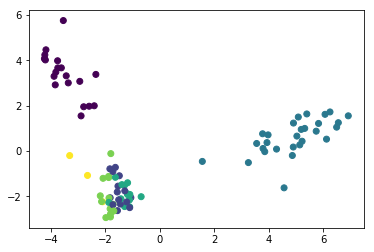

In [57]:
plt.scatter(X_test_vi[:,0] , X_test_vi[:,1] , c = Ytest)
plt.show()

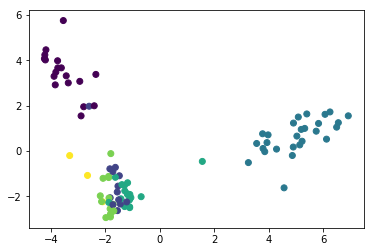

In [58]:
plt.scatter(X_test_vi[:,0] , X_test_vi[:,1] , c = Ypred)
plt.show()

Finding out the best K 

In [54]:
K_dict = {}

for i in range(1,11):
    model = KNN(k = i)
    model.fit(Xtrain,Ytrain)
    K_dict[i] = model.score(Xtest , Ytest)
    
    print(" K : " , i , " Accuracy : " , K_dict[i])
    
best_K = max(K_dict.items(), key=operator.itemgetter(1))[0]

 K :  1  Accuracy :  0.9560439560439561
 K :  2  Accuracy :  0.9560439560439561
 K :  3  Accuracy :  0.9560439560439561
 K :  4  Accuracy :  0.9560439560439561
 K :  5  Accuracy :  0.9560439560439561
 K :  6  Accuracy :  0.945054945054945
 K :  7  Accuracy :  0.945054945054945
 K :  8  Accuracy :  0.9560439560439561
 K :  9  Accuracy :  0.945054945054945
 K :  10  Accuracy :  0.945054945054945


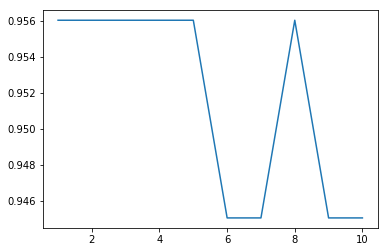

In [63]:
x_axis = list(K_dict.keys())
y_axis = list(K_dict.values())

plt.plot(x_axis , y_axis)
plt.show()

In [55]:
print(best_K)

1


Confusion Matrix 

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest, Ypred)

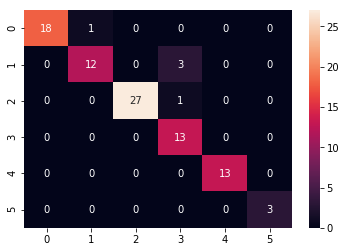

In [60]:
sns.heatmap(cm , annot=True)